In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
txn = pd.read_csv('/content/Retail_Data_Transactions.csv')

In [3]:
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [4]:
print ("number of rows:", txn.shape[0])

number of rows: 125000


In [5]:
txn['txn_date'] = pd.to_datetime(txn['trans_date'])

In [6]:
txn.drop(['trans_date'],inplace=True, axis = 1)

In [7]:
print ("min :", min(txn['txn_date']))
print ("max :", max(txn['txn_date']))

min : 2011-05-16 00:00:00
max : 2015-03-16 00:00:00


In [8]:
txn['ME_DT'] = txn['txn_date'].apply(lambda x: x if x.is_month_end else pd.offsets.MonthEnd().apply(x))  

In [9]:
txn['YEAR'] = pd.DatetimeIndex(txn['txn_date']).year

In [10]:
txn.iloc[55:60]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


## 1.2 Create features that capture annual spending

In [11]:
clnt_annual_aggregations = txn.groupby(['customer_id','YEAR']).agg(
    ann_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),ann_txn_amt_ave = pd.NamedAgg('tran_amount','mean'),
    ann_txn_amt_std = pd.NamedAgg('tran_amount','std'),ann_txn_amt_var = pd.NamedAgg('tran_amount','var'),
    ann_txn_amt_sem = pd.NamedAgg('tran_amount','sem'),ann_txn_amt_max = pd.NamedAgg('tran_amount','max'),
    ann_txn_amt_min = pd.NamedAgg('tran_amount','min'),ann_txn_amt_cnt = pd.NamedAgg('tran_amount','count'))

In [12]:
clnt_annual_aggregations.head()

ann_txn_amt_sum  ...  ann_txn_amt_cnt
customer_id YEAR                   ...                 
CS1112      2011              212  ...                3
            2012              337  ...                5
            2013              212  ...                3
            2014              212  ...                3
            2015               39  ...                1

[5 rows x 8 columns]

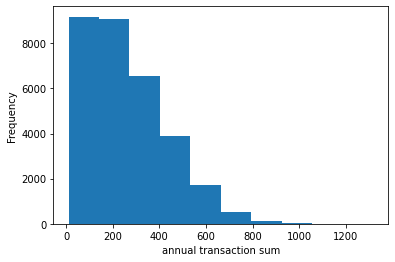

In [13]:
clnt_annual_aggregations["ann_txn_amt_sum"].plot(kind = 'hist')
plt.xlabel('annual transaction sum')
plt.show()

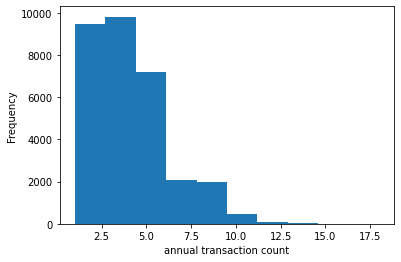

In [14]:
clnt_annual_aggregations["ann_txn_amt_cnt"].plot(kind = 'hist')
plt.xlabel('annual transaction count')
plt.show()

In [15]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot_table(index='customer_id',columns='YEAR')
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.fillna(0)
clnt_annual_aggregations_pivot.head()

ann_txn_amt_ave             ... ann_txn_amt_var            
YEAR                   2011       2012  ...            2014        2015
customer_id                             ...                            
CS1112            70.666667  67.400000  ...      284.333333    0.000000
CS1113            81.333333  74.800000  ...      781.666667  745.333333
CS1114            85.200000  75.000000  ...      726.166667    0.000000
CS1115            87.000000  67.571429  ...      512.250000    0.000000
CS1116            58.750000  76.666667  ...      636.800000    0.000000

[5 rows x 40 columns]

In [16]:
clnt_annual_aggregations_pivot.shape

(6889, 40)

In [18]:
#get values in level 0
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
#get values in level 1
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
#concat two levels to one single column value
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

In [19]:
# saves the dataframe in excel format named annual_features
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

In [20]:
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015,ann_txn_amt_sem_2011,ann_txn_amt_sem_2012,ann_txn_amt_sem_2013,ann_txn_amt_sem_2014,ann_txn_amt_sem_2015,ann_txn_amt_std_2011,ann_txn_amt_std_2012,ann_txn_amt_std_2013,ann_txn_amt_std_2014,ann_txn_amt_std_2015,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,96.0,81.0,105.0,90.0,39.0,56.0,52.0,36.0,59.0,39.0,12.719189,5.688585,19.919282,9.735388,0.000000,22.030282,12.720063,34.501208,16.862186,0.000000,212.0,337.0,212.0,212.0,39.0,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,94.0,95.0,97.0,97.0,98.0,57.0,51.0,65.0,36.0,44.0,12.170091,7.618399,5.851496,13.979151,15.762121,21.079216,17.035258,13.084342,27.958302,27.300794,244.0,374.0,426.0,226.0,220.0,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,97.0,97.0,105.0,95.0,79.0,76.0,53.0,43.0,37.0,79.0,4.352011,22.000000,11.129241,11.001263,0.000000,9.731393,31.112698,24.885739,26.947480,0.000000,426.0,150.0,352.0,425.0,79.0,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,102.0,104.0,94.0,98.0,55.0,72.0,41.0,66.0,50.0,55.0,8.660254,8.257341,3.981249,11.316470,0.000000,15.000000,21.846870,10.533394,22.632941,0.000000,261.0,473.0,557.0,313.0,55.0,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,87.0,105.0,59.0,96.0,0.0,41.0,45.0,59.0,40.0,0.0,10.601690,17.400511,0.000000,11.285389,0.000000,21.203380,30.138569,0.000000,25.234896,0.000000,235.0,230.0,59.0,333.0,0.0,449.583333,908.333333,0.000000,636.800000,0.000000


## 1.3  Create monthly aggregations

In [21]:
clnt_monthly_aggregations = txn.groupby(["customer_id","ME_DT"]).agg(
    mth_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),
    mth_txn_cnt = pd.NamedAgg('tran_amount','count'))
clnt_monthly_aggregations.droplevel(0)

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
...,...,...
2014-01-31,16,1
2014-05-31,20,1
2014-07-31,26,1


In [22]:
clnt_monthly_aggregations[:15]

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
            2012-07-31               81            1
            2012-09-30               72            1
            2012-12-31               76            1
            2013-03-31              105            1
            2013-07-31               36            1
            2013-11-30               71            1
            2014-04-30               63            1
            2014-07-31               90            1
            2014-12-31               59            1
            2015-01-31               39            1

In [23]:
from collections import Counter

mc1 = Counter(clnt_monthly_aggregations["mth_txn_amt_sum"]).most_common(1)[0][0]
maxc1 = max(clnt_monthly_aggregations["mth_txn_amt_sum"])
mc2 = Counter(clnt_monthly_aggregations["mth_txn_cnt"]).most_common(1)[0][0]
maxc2 = max(clnt_monthly_aggregations["mth_txn_cnt"])


print('Most common value of mth_txn_amt_sum:',mc1)
print('Maximum value of mth_txn_cnt:',maxc1)
print('Most common value of mth_txn_amt_sum:',mc2)
print('Maximum value of mth_txn_cnt:',maxc2)

Most common value of mth_txn_amt_sum: 77
Maximum value of mth_txn_cnt: 460
Most common value of mth_txn_amt_sum: 1
Maximum value of mth_txn_cnt: 6


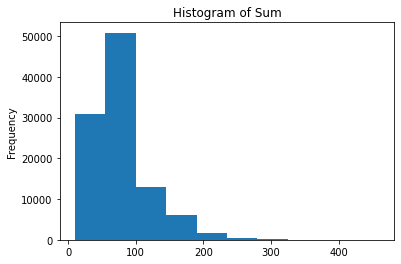

In [24]:
clnt_monthly_aggregations["mth_txn_amt_sum"].plot(kind='hist')
plt.title("Histogram of Sum")
plt.show()

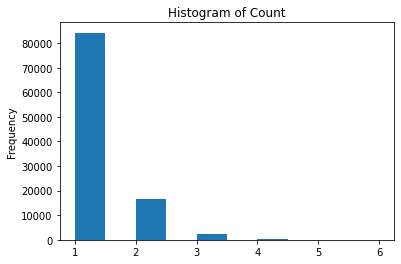

In [25]:
clnt_monthly_aggregations["mth_txn_cnt"].plot(kind='hist')
plt.title("Histogram of Count")
plt.show()

In [26]:
clnt_no = txn["customer_id"].unique()
me_dt = txn["ME_DT"].unique()

In [27]:
print('Number of unique clients: ',len(clnt_no))
print('Number of unique month-end dates:', len(me_dt))

Number of unique clients:  6889
Number of unique month-end dates: 47


In [28]:
from itertools import product
base_table = product(clnt_no,me_dt)
type(base_table)

itertools.product

In [29]:
base_table_pd = pd.DataFrame.from_records(base_table)
base_table_pd.columns=["CLNT_NO","ME_DT"]
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2011-08-31
323779,CS8077,2012-09-30
323780,CS8077,2014-09-30
323781,CS8077,2014-02-28


In [30]:
#From section 1.1
print ("min :", min(txn['txn_date']))
print ("max :", max(txn['txn_date']))

min : 2011-05-16 00:00:00
max : 2015-03-16 00:00:00


In [31]:
cs1112min = Counter((base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']["ME_DT"]) >= min(txn['ME_DT']))[1]
cs1112max = Counter((base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']["ME_DT"]) <= max(txn['ME_DT']))[1]

print('Confirming all dates are greater than the minimum month date:',cs1112min == 47)
print('Confirming all dates are less than the maximum month date:',cs1112max == 47)
print('Total number of rows in CS1112:', len(base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']))

Confirming all dates are greater than the minimum month date: True
Confirming all dates are less than the maximum month date: True
Total number of rows in CS1112: 47


In [32]:
print('Number of rows in base_table_pd:', base_table_pd.shape[0])

Number of rows in base_table_pd: 323783


In [33]:
base_clnt_mth =  base_table_pd.join(clnt_monthly_aggregations, on=['CLNT_NO','ME_DT'], how='left',sort=False) 
base_clnt_mth = base_clnt_mth.fillna(0)

In [34]:
base_clnt_mth.shape[0] == base_table_pd.shape[0]

True

In [35]:
base_clnt_mth = base_clnt_mth.sort_values(['CLNT_NO','ME_DT'],ascending = True)

In [36]:
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0


In [37]:
# calculate separately the 3, 6 and 12-month rolling window features
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO']).rolling(3,).agg(['sum','mean','max'])
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO']).rolling(6).agg(['sum','mean','max'])
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO']).rolling(12).agg(['sum','mean','max'])

rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0

In [38]:
rolling_features_6M.head(10)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048           212.0  35.333333  96.0         3.0  0.500000  1.0
        157029           212.0  35.333333  96.0         3.0  0.500000  1.0
        157049           156.0  26.000000  96.0         2.0  0.333333  1.0
        157046           156.0  26.000000  96.0         2.0  0.333333  1.0
        157032            60.0  10.000000  60.0         1.0  0.166667  1.0

In [39]:
rolling_features_12M.head(15)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048             NaN        NaN   NaN         NaN       NaN  NaN
        157029             NaN        NaN   NaN         NaN       NaN  NaN
        157049             NaN        NaN   NaN         NaN       NaN  NaN
        157046             NaN        NaN   NaN         NaN       NaN  NaN
        157032             NaN        NaN   NaN         NaN       NaN  NaN
        157045             NaN        NaN   NaN         NaN       NaN  NaN
        157062           268.0  22.333333  96.0         4.0  0.333333  1.0
        157061           268.0  22.333333  96.0         4.0  0.333333  1.0
        157073           264.0  22.000000  96.0         4.0  0.333333  1.0
        157065           345.0  28.750000  96.0         5.0  0.416667  1.0

In [40]:
cols_3M = ['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']
cols_6M = ['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']
cols_12M = ['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']
rolling_features_3M.columns = cols_3M
rolling_features_6M.columns = cols_6M
rolling_features_12M.columns = cols_12M

In [41]:
all_rolling = pd.concat([rolling_features_3M,rolling_features_6M,rolling_features_12M],axis=1)

In [42]:
all_rolling.head()

amt_sum_3M  amt_mean_3M  ...  txn_cnt_mean_12M  txn_cnt_max_12M
CLNT_NO                                  ...                                   
CS1112  157064         NaN          NaN  ...               NaN              NaN
        157058         NaN          NaN  ...               NaN              NaN
        157044        56.0    18.666667  ...               NaN              NaN
        157069       152.0    50.666667  ...               NaN              NaN
        157060        96.0    32.000000  ...               NaN              NaN

[5 rows x 18 columns]

In [43]:
all_rolling = all_rolling.droplevel(0)

In [44]:
all_rolling.head()

,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,56.0,18.666667,56.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,152.0,50.666667,96.0,2.0,0.666667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,96.0,32.000000,96.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
all_rolling.shape

(323783, 18)

In [46]:
base_clnt_mth.shape

(323783, 4)

In [47]:
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0


In [48]:
all_rolling_features = base_clnt_mth.join(all_rolling)

In [49]:
all_rolling_features.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
print('Number of rows: {} and columns: {}'.format(all_rolling_features.shape[0],
                                                  all_rolling_features.shape[1]))

Number of rows: 323783 and columns: 22


In [51]:
all_rolling_features.to_excel("mth_rolling_features.xlsx")

In [52]:
txn['day_of_the_week'] = pd.DatetimeIndex(txn['txn_date']).dayofweek
txn['day_name'] = pd.DatetimeIndex(txn['txn_date']).day_name()
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday


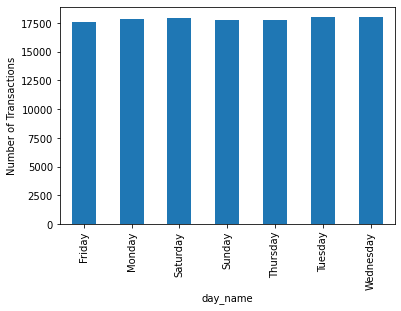

In [53]:
txn.groupby('day_name').tran_amount.count().plot(kind = 'bar')
plt.ylabel('Number of Transactions')
plt.show()

In [54]:
trans_count = txn.groupby(["customer_id","YEAR","day_name"]).count()["tran_amount"]
trans_count = pd.DataFrame(trans_count)
trans_count.columns = ['cnt']

In [55]:
trans_count_pivot = trans_count.pivot_table(index='customer_id',columns=["YEAR","day_name"])
trans_count_pivot.fillna(0,inplace=True)
trans_count_pivot.head()

cnt                         ...                                  
YEAR          2011                         ...   2015                           
day_name    Friday Monday Saturday Sunday  ... Sunday Thursday Tuesday Wednesday
customer_id                                ...                                  
CS1112         1.0    0.0      0.0    1.0  ...    0.0      0.0     0.0       1.0
CS1113         1.0    1.0      0.0    1.0  ...    0.0      0.0     0.0       1.0
CS1114         0.0    1.0      0.0    1.0  ...    0.0      1.0     0.0       0.0
CS1115         0.0    0.0      1.0    1.0  ...    0.0      1.0     0.0       0.0
CS1116         1.0    1.0      0.0    0.0  ...    0.0      0.0     0.0       0.0

[5 rows x 35 columns]

In [56]:
cols = []
for i in range(len(trans_count_pivot.columns)):
  cols.append(trans_count_pivot.columns[i][0]+ '_' +str(trans_count_pivot.columns[i][1]) + '_' + str(trans_count_pivot.columns[i][2]))

In [57]:
trans_count_pivot.columns = cols
trans_count_pivot.head()

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,cnt_2012_Sunday,cnt_2012_Thursday,cnt_2012_Tuesday,cnt_2012_Wednesday,cnt_2013_Friday,cnt_2013_Monday,cnt_2013_Saturday,cnt_2013_Sunday,cnt_2013_Thursday,cnt_2013_Tuesday,cnt_2013_Wednesday,cnt_2014_Friday,cnt_2014_Monday,cnt_2014_Saturday,cnt_2014_Sunday,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CS1113,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
CS1114,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1115,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1116,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
print('Confirm whether output has same number of rows as final output as section 1.2:',
      clnt_annual_aggregations_pivot.shape[0] == trans_count_pivot.shape[0])

Confirm whether output has same number of rows as final output as section 1.2: True


In [59]:
print ("number of features/columns create:",trans_count_pivot.shape[1])

number of features/columns create: 35


In [60]:
trans_count_pivot.to_excel("annual_day_of_week_counts_pivot.xlsx")

In [61]:
trans_count_me = txn.groupby(["customer_id" ,"ME_DT","day_name"])["tran_amount"].count()
trans_count_me = pd.DataFrame(trans_count_me) 
trans_count_me.columns = ["cnt"]

In [62]:
trans_count_me_pivot = trans_count_me.pivot_table(index=['customer_id','ME_DT'],columns=["day_name"])
trans_count_me_pivot = trans_count_me_pivot.fillna(0)

In [63]:
cols = []
for i in range(len(trans_count_me_pivot.columns)):
  cols.append(trans_count_me_pivot.columns[i][0]+ '_' + trans_count_me_pivot.columns[i][1])

In [64]:
trans_count_me_pivot.columns = cols

In [65]:
trans_count_me_pivot.head()

cnt_Friday  cnt_Monday  ...  cnt_Tuesday  cnt_Wednesday
customer_id ME_DT                               ...                            
CS1112      2011-06-30         0.0         0.0  ...          0.0            1.0
            2011-08-31         1.0         0.0  ...          0.0            0.0
            2011-10-31         0.0         0.0  ...          0.0            0.0
            2012-04-30         0.0         0.0  ...          0.0            0.0
            2012-06-30         0.0         0.0  ...          0.0            0.0

[5 rows x 7 columns]

In [66]:
mth_day_counts = base_table_pd.join(trans_count_me_pivot, on=['CLNT_NO','ME_DT'], how='left', sort=False) 
mth_day_counts = mth_day_counts.fillna(0)

In [67]:
mth_day_counts.to_excel("mth_day_counts.xlsx")

In [68]:
last_monthly_purchase = txn.groupby(['customer_id','ME_DT']).agg(last_monthly_purchase = pd.NamedAgg('txn_date','max')) 

In [69]:
last_monthly_purchase.head()

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24

In [70]:
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, on=['CLNT_NO','ME_DT'], how='left') 

In [71]:
last_monthly_purchase_base.sort_values(['CLNT_NO','ME_DT'],ascending=True,inplace=True)

In [72]:
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT


In [73]:
last_monthly_purchase_base = last_monthly_purchase_base.groupby('CLNT_NO').apply(lambda x: x.ffill())
last_monthly_purchase_base.iloc[92:98,:]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


In [74]:
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base.ME_DT - last_monthly_purchase_base.last_monthly_purchase).dt.days
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


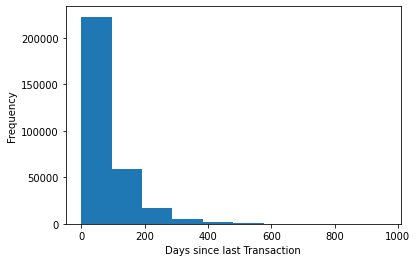

In [75]:
plt.hist(last_monthly_purchase_base['days_since_last_txn'])
plt.xlabel('Days since last Transaction')
plt.ylabel('Frequency')
plt.show()

In [76]:
last_monthly_purchase_base['days_since_last_txn'].fillna(last_monthly_purchase_base['days_since_last_txn'].median(),inplace =True)

In [77]:
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,51.0
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


In [78]:
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel("days_since_last_txn.xlsx")